# 2. Probability Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from distributions import Beta, Gaussian, StudentsT, GaussianMixture

## 2.1.1 The beta distributions

/Users/ryoito/machine_learning/PRML/distributions.py:18: RuntimeWarning: divide by zero encountered in power
  return sp.gamma(self.n_ones + self.n_zeros) * np.power(x, self.n_ones - 1) * np.power(1 - x, self.n_zeros - 1) / sp.gamma(self.n_ones) / sp.gamma(self.n_zeros)


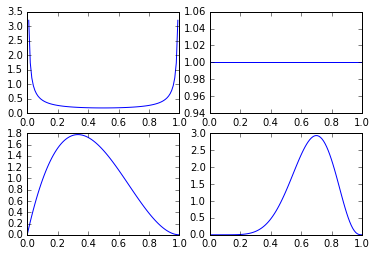

In [2]:
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = Beta(a, b)
    x = np.linspace(0, 1, 100)
    plt.plot(x, beta.predict_proba(x))

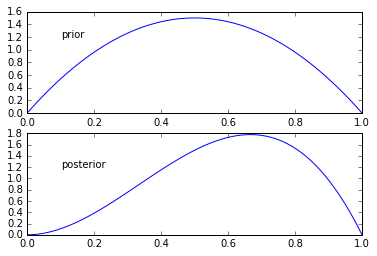

In [3]:
beta = Beta(2, 2)
plt.subplot(2, 1, 1)
plt.plot(x, beta.predict_proba(x))
plt.annotate("prior", (0.1, 1.2))

beta.fit(n_ones=1, n_zeros=0)
plt.subplot(2, 1, 2)
plt.plot(x, beta.predict_proba(x))
plt.annotate("posterior", (0.1, 1.2))

## 2.3.7 Student's t-distribution

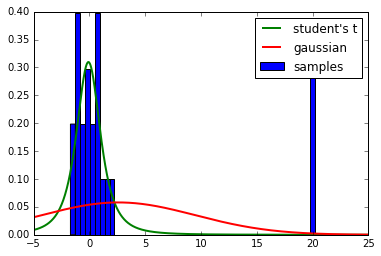

In [4]:
x = np.random.normal(size=20)
x = np.concatenate([x, np.random.normal(loc=20., size=3)])
plt.hist(x, bins=50, normed=1., label="samples")

students_t = StudentsT()
gaussian = Gaussian()

gaussian.fit(x)
students_t.fit(x)

x = np.linspace(-5, 25, 1000)
plt.plot(x, students_t.predict_proba(x), label="student's t", linewidth=2)
plt.plot(x, gaussian.predict_proba(x), label="gaussian", linewidth=2)
plt.legend()

## 2.3.9 Mixture of Gaussians

(-10, 10)

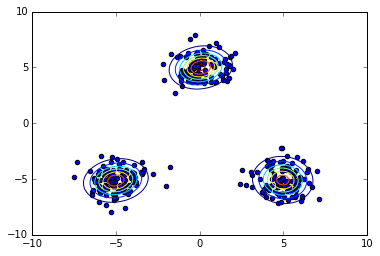

In [6]:
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
X = np.vstack((x1, x2, x3))

model = GaussianMixture(3)
model.fit(X, iter_max=100)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.predict_proba(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)